## 模型描述：

$$x_1,x_2->y$$

$$y=f(x_1,x_2)$$
$$y=e^{-\frac {t}{c}}$$

* 首先y是由x1，x2引起变化的
* 目前情况是只知道不同时间t条件下的y值，反推x1,x2与y的关系

## 问题分析

* 我们需要拟合$y=f(x1,x2)$,按照传统做法提取x1，x2特征，然后做拟合
* 但是我们只知道y和t的关系，因此图和从y和t的关系中提出x1,x2相关特征

## CNN处理

1D CNN 可以很好地应用于传感器数据的时间序列分析（比如陀螺仪或加速度计数据）；同样也可以很好地用于分析具有固定长度周期的信号数据（比如音频信号）

### 1.从最简单的BP神经网络开始

### 1.1 数据生成

因此：我们观测值是不同周期下相同时刻段内的的$f(x)$分布。

In [2]:
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib
from sklearn import preprocessing
from scipy import stats
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Reshape, GlobalAveragePooling1D
from keras.layers import Conv2D, MaxPooling2D, Conv1D, MaxPooling1D
from keras.utils import np_utils
from keras import optimizers 
from keras.utils.vis_utils import plot_model  
from sklearn.model_selection import train_test_split

In [23]:
class data_gen():
    def __init__(self,a,b,length):
        self.a=a
        self.b=b
        self.length=length
        self.c=1
        self.t=np.array([i+1 for i in range(35)])

    def RAND(self):
        data = []
        for i in range(self.length):
            data.append(random.uniform(self.a, self.b))
        return data


    def decay(self,sig1,sig2):
        data = []
        for x1, x2 in zip(sig1, sig2):
            y = 2 * x1 * np.exp(-self.t / self.c) + 2 * x2 * np.exp(-self.t / self.c)
            #y = 2 * x1 * np.exp(-self.t / self.c)
            data.append(y)
        return np.array(data)

(100000, 35)
(2, 100000)


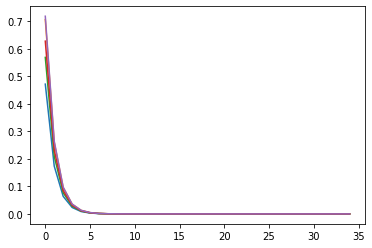

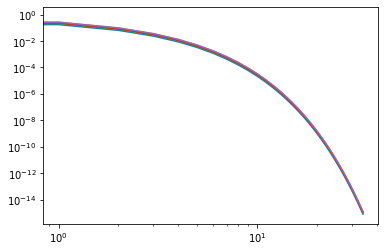

In [26]:
t = np.array([i+1 for i in range(35)])
data=data_gen(0,1,100000)
sig1=data.RAND()
sig2=data.RAND()
data_in=data.decay(sig1,sig2)

data_out=np.vstack((sig1,sig2))

print(data_in.shape)
print(data_out.shape)

plt.figure()
for j in range(5):
    plt.plot(data_in[j])
plt.show()

plt.figure()
for j in range(5):   
    plt.plot(data_in[j])
plt.xscale('log')
plt.yscale('log')
plt.show() 

### 1.2搭建模型

网络架构

In [29]:
X_temp=data_in.reshape(-1,35)
Y_temp=data_out.reshape(-1,2)
min_max_scaler_x = preprocessing.MinMaxScaler()
X_all=min_max_scaler_x.fit_transform(X_temp)
min_max_scaler_y = preprocessing.MinMaxScaler()
Y_all=min_max_scaler_y.fit_transform(Y_temp) 

in_dim=X_all.shape[1]
out_dim=Y_all.shape[1]
print(in_dim)
print(out_dim)
xtrain, xtest, ytrain, ytest=train_test_split(X_all, Y_all, test_size=0.15) 

35
2


In [30]:
#层次模型
model = Sequential()

#输入层
model.add(Dense(
    units=100,
    input_dim=in_dim,
    use_bias=True, activation= 'relu')
)  #

#隐藏层
model.add(Dense(
        units=100,
        activation= 'relu',)
)
#输出层
model.add(Dense(out_dim)
)

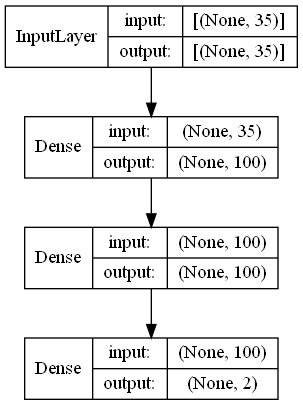

In [31]:
plot_model(model,to_file='model.png',show_shapes=True,show_layer_names=False,rankdir='TB')

In [32]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 100)               3600      
_________________________________________________________________
dense_10 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_11 (Dense)             (None, 2)                 202       
Total params: 13,902
Trainable params: 13,902
Non-trainable params: 0
_________________________________________________________________


设置优化与编译方法

In [33]:
model.compile(loss="mse", optimizer="adam")

开始训练

In [34]:
model.fit(xtrain, ytrain, epochs=20, batch_size=1000, verbose=2)

Epoch 1/20
85/85 - 0s - loss: 0.0970
Epoch 2/20
85/85 - 0s - loss: 0.0839
Epoch 3/20
85/85 - 0s - loss: 0.0838
Epoch 4/20
85/85 - 0s - loss: 0.0838
Epoch 5/20
85/85 - 0s - loss: 0.0838
Epoch 6/20
85/85 - 0s - loss: 0.0839
Epoch 7/20
85/85 - 0s - loss: 0.0838
Epoch 8/20
85/85 - 0s - loss: 0.0839
Epoch 9/20
85/85 - 0s - loss: 0.0840
Epoch 10/20
85/85 - 0s - loss: 0.0837
Epoch 11/20
85/85 - 0s - loss: 0.0837
Epoch 12/20
85/85 - 0s - loss: 0.0837
Epoch 13/20
85/85 - 0s - loss: 0.0837
Epoch 14/20
85/85 - 0s - loss: 0.0836
Epoch 15/20
85/85 - 0s - loss: 0.0838
Epoch 16/20
85/85 - 0s - loss: 0.0838
Epoch 17/20
85/85 - 0s - loss: 0.0836
Epoch 18/20
85/85 - 0s - loss: 0.0839
Epoch 19/20
85/85 - 0s - loss: 0.0836
Epoch 20/20
85/85 - 0s - loss: 0.0836


In [35]:
xtest

array([[0.69038624, 0.69038624, 0.69038624, ..., 0.69038624, 0.69038624,
        0.69038624],
       [0.50980999, 0.50980999, 0.50980999, ..., 0.50980999, 0.50980999,
        0.50980999],
       [0.11312842, 0.11312842, 0.11312842, ..., 0.11312842, 0.11312842,
        0.11312842],
       ...,
       [0.30322346, 0.30322346, 0.30322346, ..., 0.30322346, 0.30322346,
        0.30322346],
       [0.67350256, 0.67350256, 0.67350256, ..., 0.67350256, 0.67350256,
        0.67350256],
       [0.30915831, 0.30915831, 0.30915831, ..., 0.30915831, 0.30915831,
        0.30915831]])

In [36]:
ypred = model.predict(xtest)

In [37]:
ypred

array([[0.5109292 , 0.5127644 ],
       [0.5075178 , 0.51129353],
       [0.49889636, 0.50959975],
       ...,
       [0.50337374, 0.5101597 ],
       [0.5105649 , 0.51254225],
       [0.503521  , 0.5102597 ]], dtype=float32)

In [38]:
ytest

array([[0.38537204, 0.8818805 ],
       [0.93500666, 0.60781593],
       [0.87140295, 0.72158311],
       ...,
       [0.69622421, 0.77631551],
       [0.94993401, 0.71609839],
       [0.13450974, 0.46104712]])

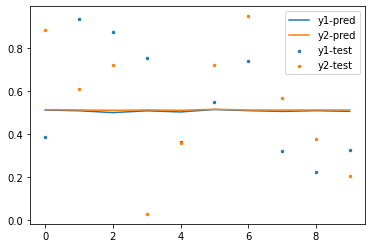

In [39]:
x_ax = range(len(xtest))
plt.scatter(x_ax[0:10], ytest[0:10,0],  s=6, label="y1-test")
plt.plot(x_ax[0:10], ypred[0:10,0], label="y1-pred")
plt.scatter(x_ax[0:10], ytest[0:10,1],  s=6, label="y2-test")
plt.plot(x_ax[0:10], ypred[0:10,1], label="y2-pred")
plt.legend()
plt.show()